# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**

## Name:  Anvi Agarwal

## UNI: aa5001

## The Dataset

### Description
This dataset contains details of individual relating to their health. The target is stored in **strokes** column which is binary variable indicating either 0 or 1. The goal of the assignment is a binary classification task to predict wether the person will get a stroke depending on other health factors

In [122]:
import warnings
warnings.filterwarnings("ignore")

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [124]:
## YOUR CODE HERE
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**1.2: Show or Plot % of missing values in each column. Would you consider dropping any columns or assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping)**

In [125]:
df.info()
#only bmi has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


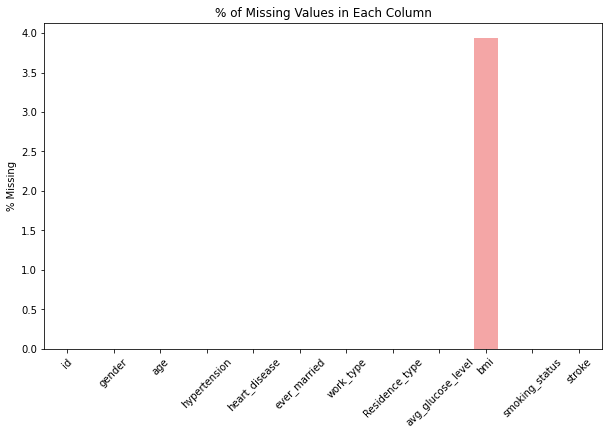

In [126]:
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a bar plot to visualize missing value percentages
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('% of Missing Values in Each Column')
plt.ylabel('% Missing')
plt.xticks(rotation=45)

plt.show()

Since there are only 4% null values in the BMI column, we can drop the null values in the column (instead of taking an average etc.), since 96% of 5110 rows is a big enough dataset.

In [127]:
df.dropna(subset=['bmi'], inplace=True)


**Check for the number of rows after handling null values, each column should have the same number of non-null count**

In [128]:
## YOUR CODE HERE
df.info()
#Total number of rows = 4909

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


**1.3 Print the distribution of the target variable. Is the dataset balanced?**

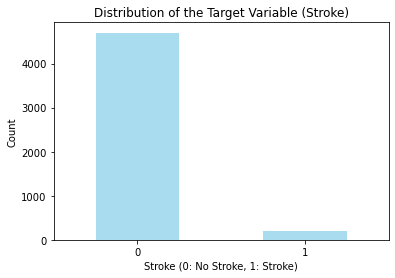

In [129]:
target_distribution = df['stroke'].value_counts()

# Plot 
plt.figure(figsize=(6, 4))
target_distribution.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of the Target Variable (Stroke)')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

In [130]:
target_distribution

0    4700
1     209
Name: stroke, dtype: int64

**Your Comments Here**: The dataset is imbalanced

**1.4: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

**Clarification with Example below : Here `flWinner` is the Target Variable and `descMapName` is a categorical feature. You are required to make such side-by-side bar plot for each categorical feature with repect to it's class distribution with the target feature for our dataset.**

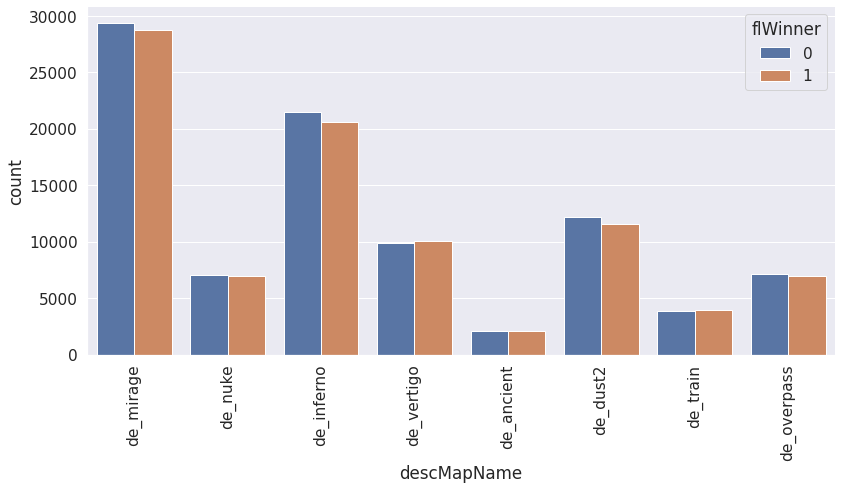

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [132]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


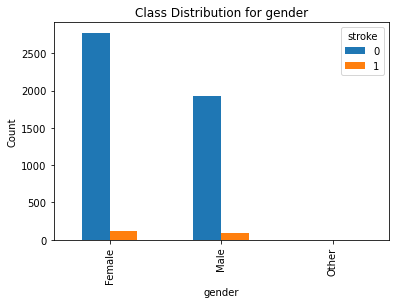

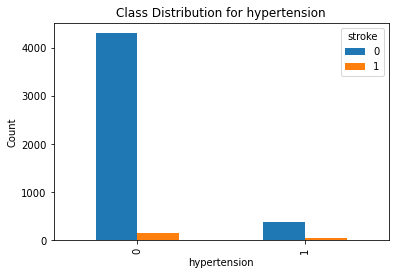

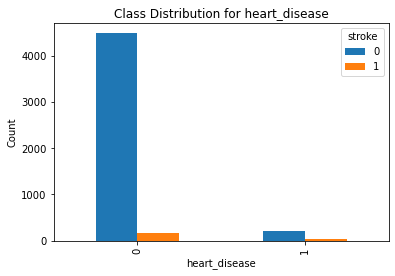

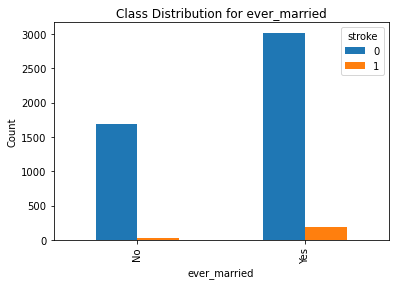

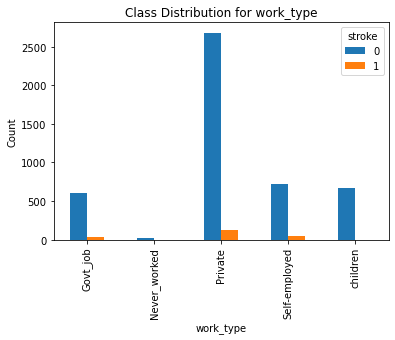

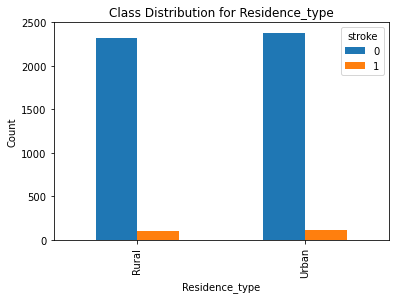

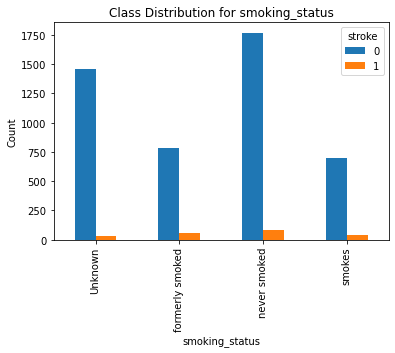

In [133]:
# Your code here
categorical_features = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

for feature in categorical_features:
    grouped = df.groupby([feature, 'stroke']).size().reset_index(name='counts')
    pivoted_feat = grouped.pivot(index=feature, columns='stroke', values='counts')
    pivoted_feat.plot(kind='bar', stacked=False)
    plt.title(f"Class Distribution for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify.**

In [134]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


In [135]:
corr_threshold = 0.9
corr_pairs = np.where(np.triu(np.abs(corr) >= corr_threshold, k=1))
corr_pairs = [(corr.index[i], corr.columns[j]) for i, j in zip(*corr_pairs)]
corr_pairs

[]

In [136]:
## YOUR CODE HERE
df_dum = pd.get_dummies(df, columns=['gender','hypertension','heart_disease','ever_married', 
                                     'work_type', 'Residence_type', 'smoking_status'])
df_dum = df_dum.drop(columns=['id'])
df_dum

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,105.92,32.5,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
5,81.0,186.21,29.0,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,103.08,18.6,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
5106,81.0,125.20,40.0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,82.99,30.6,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,166.29,25.6,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0


**Your Comments Here**: 
Dropping 'id' column because it resembles the index of the dataset and according to me, it shouldn't have any significant impact on the dataset. None of the variables have high correlation, hence I do not drop any other columns.

One hot encoding: We process the categorical columns through OHE since they are nominal in nature & there are appropriate number of categories

Scaling: We do not need to scale the data when using decision trees (Random Forests & GBTs are ensembles of Decision Trees). Decision trees are not sensitive to the scale of features. The algorithm makes binary decisions at each node of the tree based on feature values, and these decisions are independent of the scale of the features.

**1.6: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

In [137]:
## YOUR CODE HERE
X = df_dum.drop(columns=['stroke'])
y = df_dum['stroke'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

**Your Comments Here**: Based on the imbalance of the data, we use stratified sampling for train and test split. It helps to preserve the same proportions of examples in each class as observed in the original data.

**1.7: Fit a Decision Tree on the training data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**


**HINT : Think about the proportion of the class label**

In [138]:
## YOUR CODE HERE
dec_tree = DecisionTreeClassifier(random_state = 0)
dec_tree.fit(X_train, y_train)

y_train_pred = dec_tree.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred)
train_acc = accuracy_score(y_train, y_train_pred)

y_test_pred = dec_tree.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Development set F1-score: {train_f1:.3f}")
print(f"Development set accuracy: {train_acc:.3f}")

print(f"Test set F1-score: {test_f1:.3f}")
print(f"Test set accuracy: {test_acc:.3f}")

Development set F1-score: 1.000
Development set accuracy: 1.000
Test set F1-score: 0.092
Test set accuracy: 0.920


**Your Comments Here**

**1.8: Visualize the trained tree until the max_depth 8**

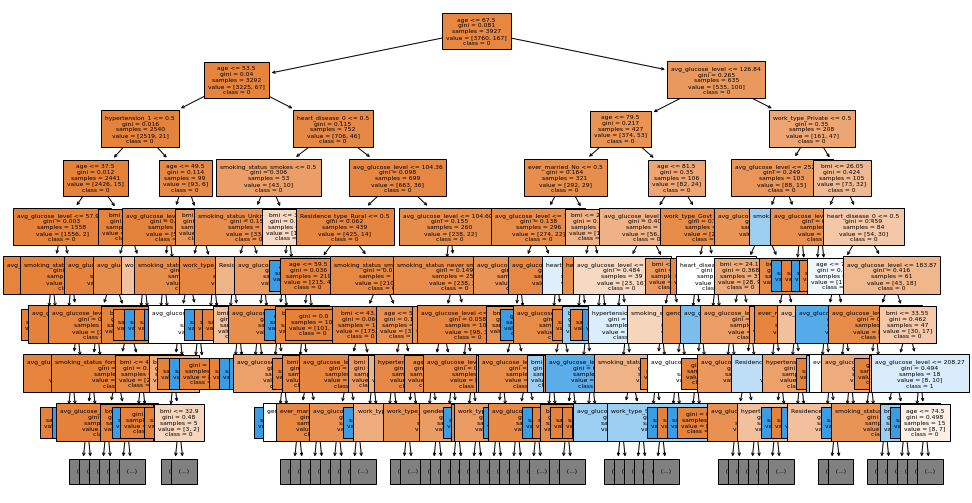

In [139]:
## YOUR CODE HERE
plt.figure(figsize = (16,9))
plot_tree(dec_tree, filled = True, feature_names = X_train.columns, class_names = ['0', '1'], fontsize = 6, max_depth = 8)
plt.show()

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance. Carefully consider which metric to use considering the imbalance in the class label.**

In [140]:
## YOUR CODE HERE
path = dec_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

accuracy_valid = []
f1_valid = []

for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    y_pred_valid = pruned_tree.predict(X_test)
    accuracy_valid.append(accuracy_score(y_test, y_pred_valid))
    f1_valid.append(f1_score(y_test, y_pred_valid))

best_alpha = ccp_alphas[np.argmax(f1_valid)]

pruned_tree = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = best_alpha)
pruned_tree.fit(X_train, y_train)

y_pred_test = pruned_tree.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("Best alpha:", best_alpha)
print("Accuracy on test set:", accuracy_test)
print("F1 score on test set:", f1_test)

Best alpha: 0.000249111502308433
Accuracy on test set: 0.9307535641547862
F1 score on test set: 0.15


**Your Comments Here**

**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

Top 3 most important features:
1. avg_glucose_level: 0.31161142896090965
2. age: 0.3027778077170208
3. bmi: 0.18138617753463804


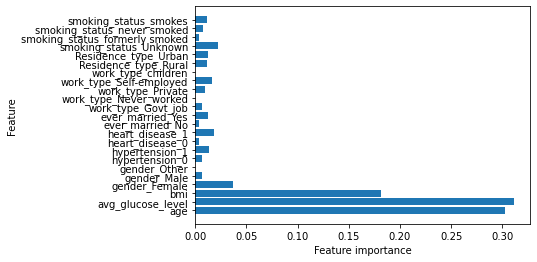

In [141]:
## YOUR CODE HERE

importances = pruned_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 3 most important features:")

for i in range(3):
    print(f"{i+1}. {X.columns[indices[i]]}: {importances[indices[i]]}")

def plot_feature_importances(pruned_tree):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), pruned_tree.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(pruned_tree)

**Your Comments Here**: The top 3 features are average glucose level, age and BMI. These seem justified since strokes are directly related to the blood sugar level. As age increases, so would the chance of a stroke. Body mass index would also play a role.

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [142]:
## YOUR CODE HERE
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest F1-score: {f1:.4f}")

Random Forest Accuracy: 0.9562
Random Forest F1-score: 0.0444


**Your Comments Here**: Random forest has a better Accruacy than decision trees (0.953 v/s 0.926) but a worse F-1 Score (0.041 v/s 0.162)

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [143]:
# ## YOUR CODE HERE
print(np.mean([np.mean(tree.tree_.impurity) for tree in rf.estimators_]))

scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring ='accuracy')
mean_score = scores.mean()
print(f"Random Forest mean accuracy: {mean_score:.4f}")

0.1331792810969975
Random Forest mean accuracy: 0.9557


**Your Comments Here**: No all the trees do not have pure leaves which is verified as shown above. Mean impurity of trees should be 0 for all pure but here it is 0.132

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [144]:
## YOUR CODE HERE

**Your Comments Here**:Two hyperparameters I would choose would be n_estimators because more the number of trees better the performance and max_depth because if too much depth would lead to overfitting and too few would lead to under fit and hence we need to specify the correct balance.

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

**Your Comments Here**: We choose default parameters first and then based on complexity of data and number of features we set ranges.

In [145]:
## YOUR ANSWER HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

n_estimators = [50, 100, 200, 500, 1000]
max_depth = [5, 10, 15, 20, 25]


param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth}

scoring = {'f1_score': make_scorer(f1_score)}

grid_search = GridSearchCV(rf, param_grid = param_grid, scoring = scoring, refit = 'f1_score', cv = 5, verbose = 1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
f1_score_test = f1_score(y_test, y_pred_test)
accuracy_test = np.mean(y_test == y_pred_test)
print("Test F1 score: ", f1_score_test)
print("Test accuracy: ", accuracy_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best hyperparameters:  {'max_depth': 10, 'n_estimators': 1000}
Best F1 score:  0.02253968253968254
Test F1 score:  0.046511627906976744
Test accuracy:  0.9582484725050916


**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [146]:
from sklearn.model_selection import cross_val_score

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with cross-validation
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())

best_rf = grid_search.best_estimator_

# Now, evaluate the best model on the test dataset
y_test_pred = best_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test accuracy with optimal hyperparameters:", test_acc)
print("Test F1 score with optimal hyperparameters:", test_f1)


Best hyperparameters: {'max_depth': 5, 'n_estimators': 100}
Cross-Validation Scores: [0.956743   0.956743   0.95796178 0.95796178 0.95796178]
Mean CV Accuracy: 0.9574742710815058
Test accuracy with optimal hyperparameters: 0.9572301425661914
Test F1 score with optimal hyperparameters: 0.9363125223852444


**Your Comments Here**: The accuracy remains the same, but the F-1 score has increased drastically (from 0.041 to 0.936)

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

In [147]:
## YOUR CODE HERE
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = [X_train.columns[i] for i in indices[:3]]
print("Top 3 features:", top_features)

Top 3 features: ['age', 'avg_glucose_level', 'bmi']


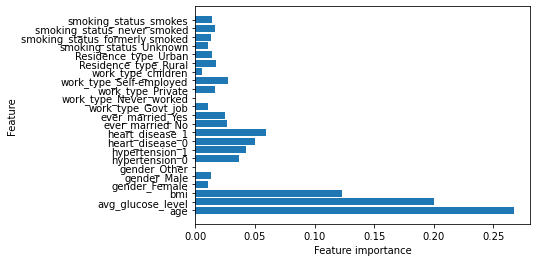

In [148]:
def plot_feature_importances(best_rf):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), best_rf.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(best_rf)

**Your Comments Here**:  The most important feature here is age which implies that the older you are, the more likely people are to have a stroke. The glucose level and BMI also makes sense. In Q1.9 the top 3 features remained the same, just the rankes have been switched. However, the feature importance for random forest has given a little more weightage to the rest of the independent variables than for the plain decision trees. Hence. I feel that while both sets make sense, the ones from the more accurate model - random forest, make more sense.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation.  
You can use GridSearchCV, however make sure to use appropriate metric for the scoring parameter of GridSearchCV.  
Report on the time taken to do model selection for both the models. Also, report the performance of the test
dataset from the optimal models.**

In [149]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
import time

param_grid_gb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 4, 6],
    'n_estimators': [50, 100, 150]
}

param_grid_hist_gb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 4, 6],
    'max_leaf_nodes': [16, 32, 64]
}


model_gb = GradientBoostingClassifier()
model_hist_gb = HistGradientBoostingClassifier()

grid_search_gb = GridSearchCV(model_gb, param_grid_gb, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_hist_gb = GridSearchCV(model_hist_gb, param_grid_hist_gb, cv=5, n_jobs=-1, scoring='accuracy')


start_time_gb = time.time()
grid_search_gb.fit(X_train, y_train)
end_time_gb = time.time()
start_time_hist_gb = time.time()
grid_search_hist_gb.fit(X_train, y_train)
end_time_hist_gb = time.time()


print("Time taken for GradientBoostingClassifier model selection: {:.2f} seconds".format(end_time_gb - start_time_gb))
print("Time taken for HistGradientBoostingClassifier model selection: {:.2f} seconds".format(end_time_hist_gb - start_time_hist_gb))

print("Optimal hyperparameters for GradientBoostingClassifier:", grid_search_gb.best_params_)
print("Best cross-validation score for GradientBoostingClassifier:", grid_search_gb.best_score_)
print("Test set score for GradientBoostingClassifier:", grid_search_gb.score(X_test, y_test))

print("Optimal hyperparameters for HistGradientBoostingClassifier:", grid_search_hist_gb.best_params_)
print("Best cross-validation score for HistGradientBoostingClassifier:", grid_search_hist_gb.best_score_)
print("Test set score for HistGradientBoostingClassifier:", grid_search_hist_gb.score(X_test, y_test))


Time taken for GradientBoostingClassifier model selection: 17.10 seconds
Time taken for HistGradientBoostingClassifier model selection: 5.73 seconds
Optimal hyperparameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Best cross-validation score for GradientBoostingClassifier: 0.9572207905868625
Test set score for GradientBoostingClassifier: 0.9572301425661914
Optimal hyperparameters for HistGradientBoostingClassifier: {'learning_rate': 0.2, 'max_depth': 2, 'max_leaf_nodes': 16}
Best cross-validation score for HistGradientBoostingClassifier: 0.9577293722954247
Test set score for HistGradientBoostingClassifier: 0.9572301425661914


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [150]:
from xgboost import XGBClassifier
import time

# Define the XGBoost model
xgb = XGBClassifier()

# Define the hyperparameter grid
params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0]
}

# Perform grid search with cross-validation
start_time = time.time()
grid_search = GridSearchCV(xgb, params, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
end_time = time.time()

print("Time taken for model selection: {:.2f} seconds".format(end_time - start_time))
print('Optimal hyperparameters:', grid_search.best_params_)

# Calculate development accuracy and F1 score with cross-validation
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, scoring='accuracy')
print('Cross-Validation Accuracy Scores:', cross_val_scores)
print('Mean Cross-Validation Accuracy:', cross_val_scores.mean())

# Train the model with the optimal hyperparameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Calculate development accuracy and F1 score
y_train_pred = best_xgb.predict(X_train)
dev_acc = accuracy_score(y_train, y_train_pred)
dev_f1 = f1_score(y_train, y_train_pred)

print('Development accuracy:', dev_acc)
print('Development F1 score:', dev_f1)

# Calculate test accuracy and F1 score
y_test_pred = best_xgb.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Test accuracy:', test_acc)
print('Test F1 score:', test_f1)


Time taken for model selection: 6.47 seconds
Optimal hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
Cross-Validation Accuracy Scores: [0.956743   0.95419847 0.95419847 0.95928753 0.956743   0.956743
 0.956743   0.95918367 0.96173469 0.96173469]
Mean Cross-Validation Accuracy: 0.9577309549774109
Development accuracy: 0.9602750190985485
Development F1 score: 0.13333333333333333
Test accuracy: 0.955193482688391
Test F1 score: 0.0


**Your Comments Here** :
The test set scores for HGB and GCB is the same at 0.9572, while for XGB it's a little lower at 0.955


**3.3: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

In [153]:

xgb = XGBClassifier(learning_rate = 0.01, max_depth = 2, subsample = 0.7)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
hgb = HistGradientBoostingClassifier(learning_rate = 0.05, max_depth = 2, min_samples_leaf = 10)
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)
acc_hgb = accuracy_score(y_test, y_pred_hgb)
f1_hgb = f1_score(y_test, y_pred_hgb)


                  feature  importance
0                     age    0.351101
22  smoking_status_smokes    0.136195
14      work_type_Private    0.118796


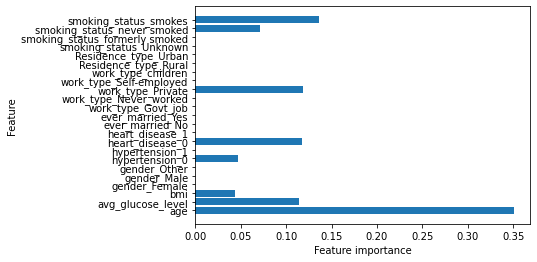

In [154]:
## YOUR CODE HERE

importance = xgb.feature_importances_
feature_names = X_train.columns
features = pd.DataFrame({'feature': feature_names, 'importance': importance})
features = features.sort_values('importance', ascending = False)
top_features = features.head(3)
print(top_features)

def plot_feature_importances(xgb):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), xgb.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(xgb)

**Your Comments Here**: the top 3 features in this model are Age, whether they smoke and the sector they work in. This is much different than Decision trees and Random Forest since they both had age, BMI and glucose level.

**3.4: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [115]:
## YOUR CODE HERE
top_features = np.argsort(xgb.feature_importances_)[::-1][:7]
x_temp = np.array(X_train)
X_train_top = x_temp[:, top_features]
x_temp = np.array(X_test)
X_test_top = x_temp[:, top_features]
xgb_top = XGBClassifier()
xgb_top.fit(X_train_top, y_train)
y_pred = xgb_top.predict(X_test_top)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(top_features)
print("Test Accuracy:", acc)
print("Test F1 Score:", f1)

[ 0 22 14  8  1 21  6]
Test Accuracy: 0.9439918533604889
Test F1 Score: 0.06779661016949151


**Your comments here**: The Test accuracy in this is a little lower than Q3.2 (0.943 v/s 0.955) but the F-1 score has improved by a notch (0.067 v/s 0)

**3.5: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**



## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [116]:
## YOUR CODE HERE
from sklearn.metrics import brier_score_loss

y_prob = xgb.predict_proba(X_test)[:, 0]
brier_score = brier_score_loss(y_test, y_prob)

print("Brier score:", brier_score)

Brier score: 0.8182440518164013


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods. Report brier score after calibration.**

Brier Score after Isotonic Calibration: 0.04384701631076008
Brier Score after Platt Scaling Calibration: 0.045927130182889665


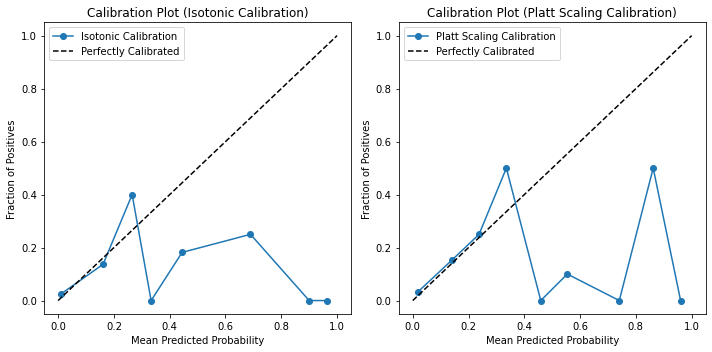

In [121]:
## YOUR CODE HERE
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss



iso_calibrated_model = CalibratedClassifierCV(best_xgb, method='isotonic', cv='prefit')
iso_calibrated_model.fit(X_train, y_train)

platt_calibrated_model = CalibratedClassifierCV(best_xgb, method='sigmoid', cv='prefit')
platt_calibrated_model.fit(X_train, y_train)


y_prob_iso = iso_calibrated_model.predict_proba(X_test)[:, 1]  # Probability of class 1
y_prob_platt = platt_calibrated_model.predict_proba(X_test)[:, 1]  # Probability of class 1


brier_score_iso = brier_score_loss(y_test, y_prob_iso)
brier_score_platt = brier_score_loss(y_test, y_prob_platt)

print("Brier Score after Isotonic Calibration:", brier_score_iso)
print("Brier Score after Platt Scaling Calibration:", brier_score_platt)

# Plot predicted vs. actual probabilities for both calibration methods
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
fraction_of_positives_iso, mean_predicted_value_iso = calibration_curve(y_test, y_prob_iso, n_bins=10)
plt.plot(mean_predicted_value_iso, fraction_of_positives_iso, marker='o', label="Isotonic Calibration")
plt.plot([0, 1], [0, 1], 'k--', label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Plot (Isotonic Calibration)")
plt.legend()

plt.subplot(1, 2, 2)
fraction_of_positives_platt, mean_predicted_value_platt = calibration_curve(y_test, y_prob_platt, n_bins=10)
plt.plot(mean_predicted_value_platt, fraction_of_positives_platt, marker='o', label="Platt Scaling Calibration")
plt.plot([0, 1], [0, 1], 'k--', label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Plot (Platt Scaling Calibration)")
plt.legend()

plt.tight_layout()
plt.show()



**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [120]:
## YOUR CODE HERE
brier_score_iso = brier_score_loss(y_test, y_prob_iso)
brier_score_platt = brier_score_loss(y_test, y_prob_platt)
print("Brier ISO:", brier_score_iso, "; Brier Platt", brier_score_platt)

Brier ISO: 0.04384701631076008 ; Brier Platt 0.045927130182889665


 Lower Brier scores suggest better calibration, hence Isotonic regression has a little better caliberation